## 머신러닝
# 커널(kernel) 기법
- 기존 속성들을 변환하거나 새로운 속성을 추가하는 기법
- 모든 데이터에는 **숨겨진 속성** 또는 **패턴**이 존재한다는 믿음이다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 테스트 데이터 만들기

In [2]:
from sklearn.datasets import make_circles

In [3]:
X, y = make_circles(100, noise=0.1, factor=0.6) # 0: 반지름이 1인 점 50개, 1: 반지름이 0.6인 점 50개

In [5]:
X.shape, y.shape

((100, 2), (100,))

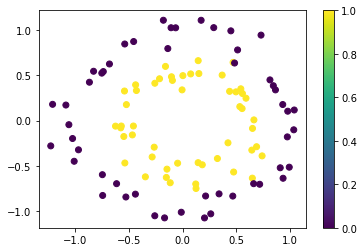

In [26]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

In [10]:
X0 = X[y==0]
X1 = X[y==1]
X0.shape, X1.shape

((50, 2), (50, 2))

In [11]:
(X0**2).sum(axis=1).mean(), (X1**2).sum(axis=1).mean()

(1.0238343906092489, 0.34542539399762395)

> - 위 그림에서 굳이 x, y 좌표를 사용할 필요가 있을까?
> - 더 좋은 좌표계를 생각해 보자

### 속성을 추가하는 커널 기법

In [12]:
X2 = np.c_[X, X**2] # 각 속성들을 제곱한 값을 새로운 속성으로 추가한다

In [13]:
X2.shape

(100, 4)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()
model.fit(X2, y)
model.score(X2, y)

0.99

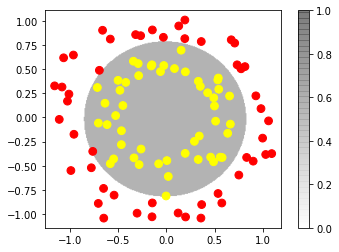

In [16]:
scale = 300
xmax = X[:,0].max()+.1
xmin = X[:,0].min()-.1
ymax = X[:,1].max()+.1
ymin = X[:,1].min()-.1

xx = np.linspace(xmin,xmax,scale)
yy = np.linspace(ymin,ymax,scale)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
X_grid = np.c_[X_grid, X_grid**2]

y_pred = model.predict(X_grid)

CS = plt.imshow(y_pred.reshape(scale,scale), interpolation=None, origin='lower',
                extent=[xmin,xmax,ymin,ymax], alpha=0.3, cmap='gray_r')

# draw X_train
plt.scatter(X[:,0], X[:,1], c=y, s=60, cmap='autumn')
plt.colorbar(CS)

In [17]:
model.coef_, model.intercept_

(array([[-0.10820956, -0.11257583, -3.31568707, -3.62008191]]),
 array([2.33664904]))

In [18]:
np.sqrt(2.3/3.5) # 안쪽원과 바깥쪽원의 중간값이 0.8임

0.8106434833777776

### 다항식 회귀

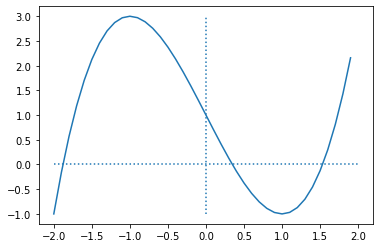

In [24]:
xs = np.arange(-2, 2, 0.1)
ys = (xs**3) - 3*xs + 1

plt.plot(xs, ys)
plt.hlines([0], xmin=-2, xmax=2, linestyles=':')
plt.vlines([0], ymin=-1, ymax=3, linestyles=':')

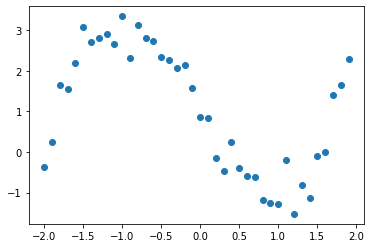

In [33]:
xs = np.arange(-2, 2, 0.1)
ys = (xs**3) - 3*xs + 1 + np.random.randn(40)/2

plt.scatter(xs, ys)

In [34]:
xs.shape, ys.shape

((40,), (40,))

In [31]:
from sklearn.linear_model import LinearRegression

In [36]:
X = np.c_[xs, xs**2, xs**3]
y = ys

X.shape, y.shape

((40, 3), (40,))

In [37]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [38]:
model.coef_, model.intercept_

(array([-3.12288634,  0.11526104,  0.99574132]), 0.933145061290954)

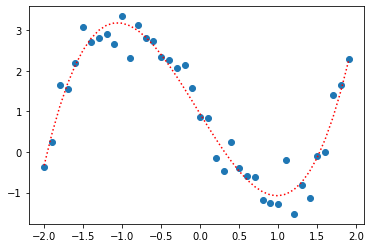

In [43]:
plt.scatter(X[:,0], y)

c1 = np.arange(-2, 2, 0.1)
c2 = model.predict(np.c_[c1, c1**2, c1**3])
plt.plot(c1, c2, 'r:')

> 결국 곡선은 직선으로 분해할 수 있다. 위와 같이 다항식 커널을 이용해 복잡한 곡선결과를 얻을 수 있다.